<a href="https://colab.research.google.com/github/gasujina-prog/Python25Study/blob/main/06_02_k%ED%8F%89%EA%B7%A0(mean).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# k-평균(k-means) 군집 알고리즘이 비지도 학습의 평균값을 자동으로 찾아줌

# 이 평균값이 클러스터의 중심에 위치하기 때문에 클러스터 중심,
# 센트로이드(centroid : 무게중심) 라고 부름

# 1. 무작위로 k 개의 클러스터 중심을 정함
# 2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
# 3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경
# 4. 클러스터 중심에 변화가 없을 때 까지 2번으로 돌아가 반복

# 1단계 : 랜덤하게 중심지정
# 바나나, 바나(중심)나, 사과
# 사과, 사과,(중심), 파인애플
# 바나나, 파인(중심)애플, 파인애플

# 2단계 : 왼쪽 위부터 시계방향으로 중심점 이동 후 2번 반복
# 바나(중심)나, 바나나, 바나나
# 사과, 사과,(중심), 사과
# 파인애플, 파인애플, 파인(중심)애플

# 3단계
# 바나나, 바나(중심)나, 바나나
# 사과, 사과(중심), 사과
# 파인애플, 파인(중심)애플, 파인애플

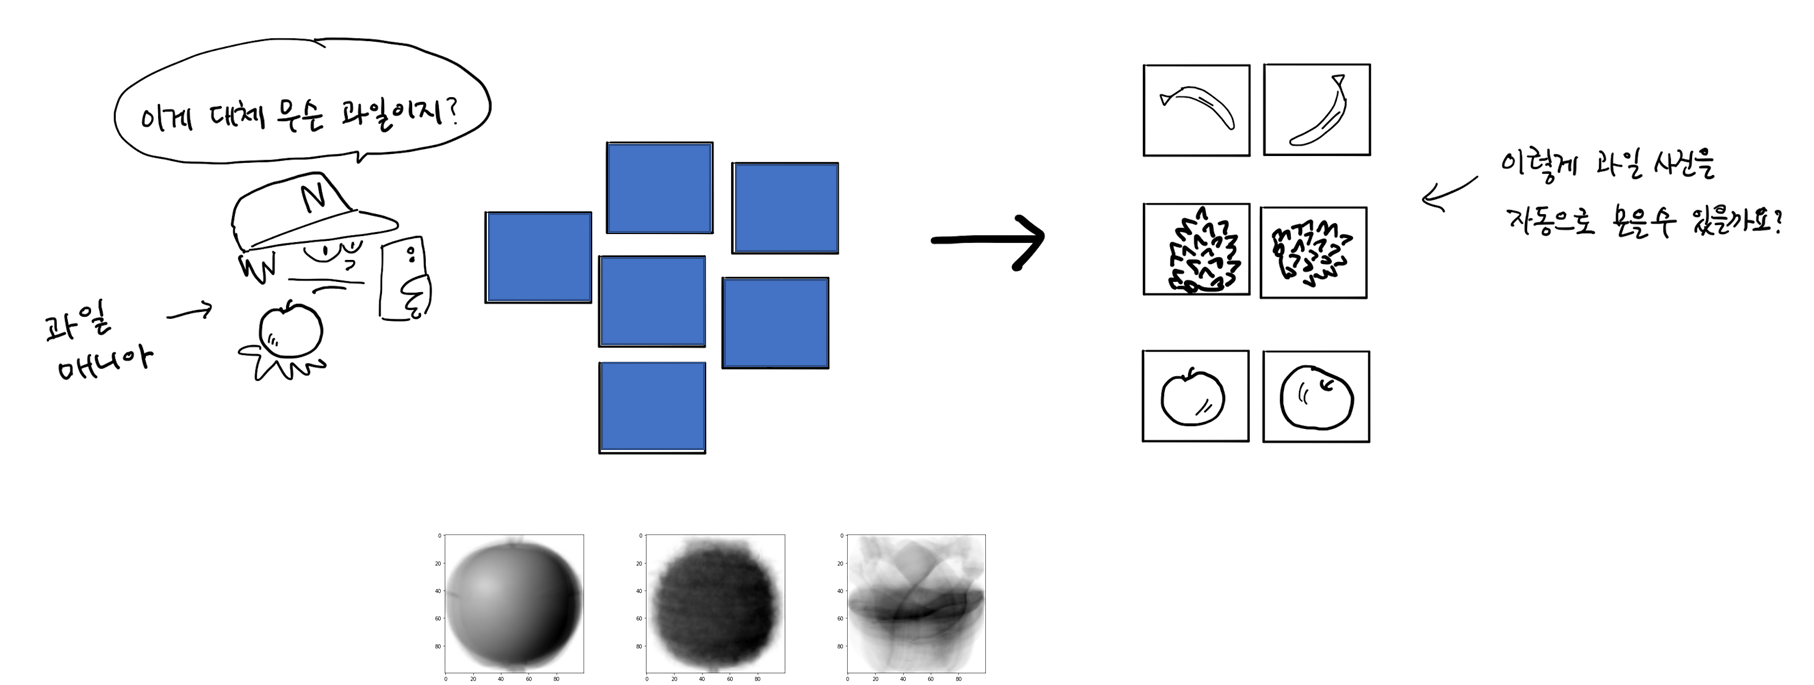

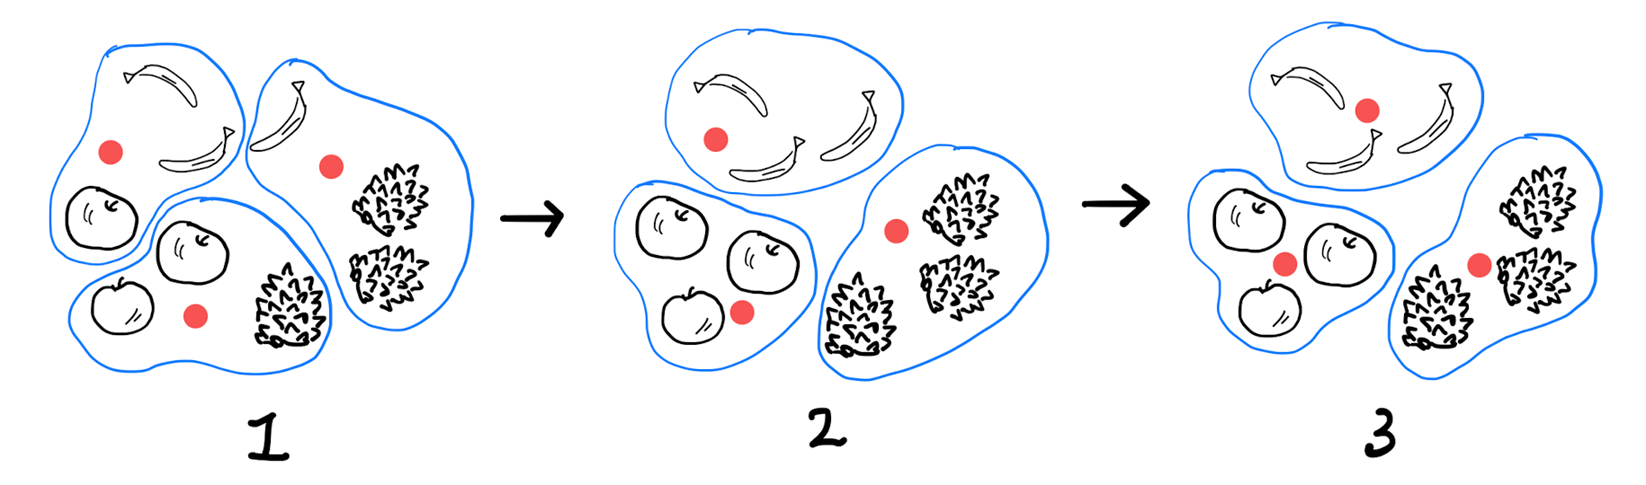

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-11-11 06:46:42--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-11 06:46:42--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-11 06:46:43--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
import numpy as np
#shape(쉐이프) 모양을 만들다
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
# 샘플 개수, 너비 높이로 변경 → 2차원으로 모양 만듬

print(fruits.shape) # 샘플 개수 300개, 가로 세로 각 배열당 100

(300, 100, 100)


In [4]:
print(fruits_2d.shape)

(300, 10000)


In [6]:
from sklearn.cluster import KMeans
#사이킷 런에 클러스터 모듈 아래 KMeans 클래스.... 사이킷런 당신은 대체 없는거 뭐요

km = KMeans(n_clusters=3, random_state=42)

km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [7]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [8]:
# 현재 0이 바나난지 파인애플인지 모름
# 직접 이미지를 출력해봐야 암
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


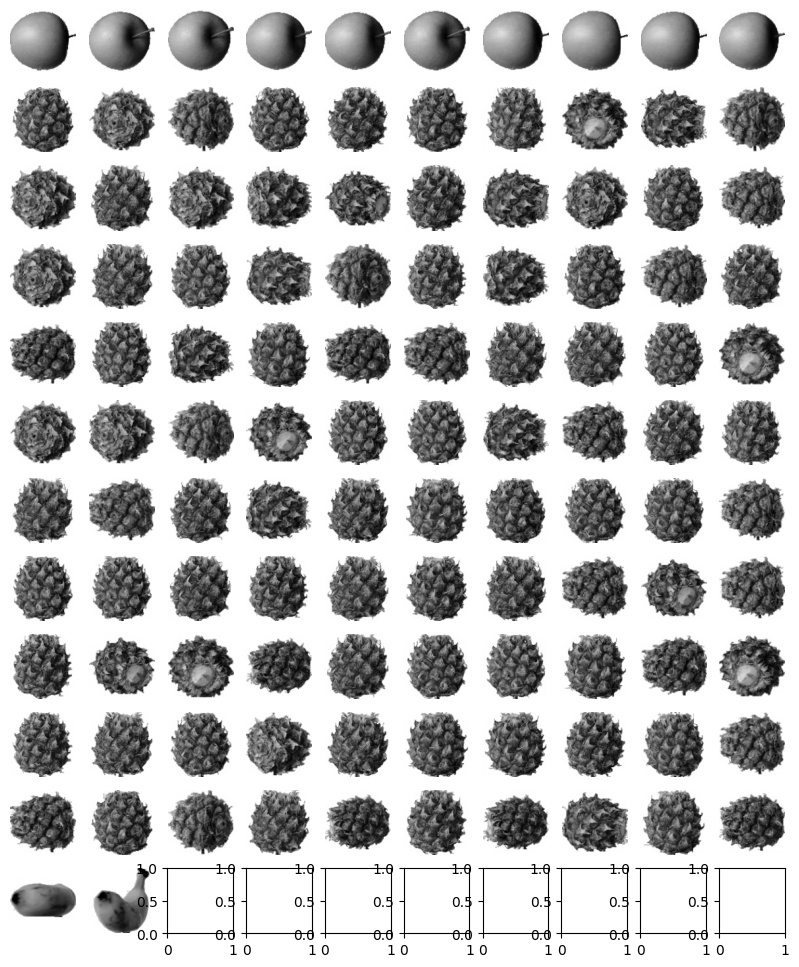

In [15]:
# 그림으로 출력하기 위한 draw_fruit()을 만들어봄
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1): # ratio = 비율, 비
    n = len(arr) # 여기서 n은 샘플 개수를 뜻함
    # 한줄에 10개씩 이미지를 생성함. 샘플 개수를 10으로 나눠 전체 행 개수를 계산함

    rows = int(np.ceil(n/10))
    # 행이 1개면 열 개수는 샘플개수. 그렇지 않다면 10개이다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
      for j in range(cols):
        if i * 10 + j < n:
              axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
              axs[i, j].axis('off')
    plt.show()
draw_fruits(fruits[km.labels_==0])

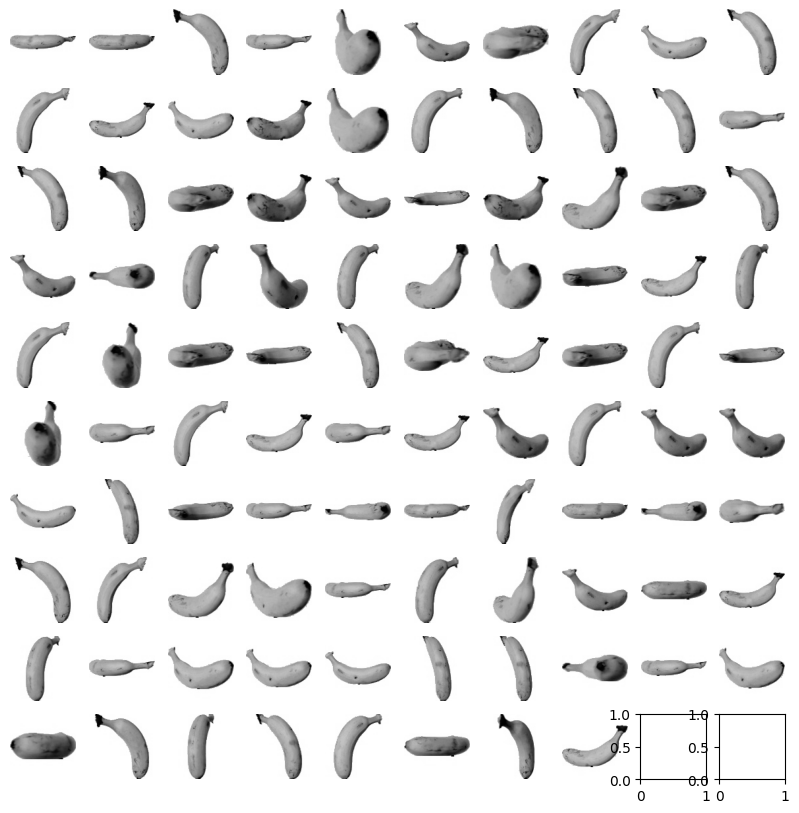

In [16]:
draw_fruits(fruits[km.labels_==1])

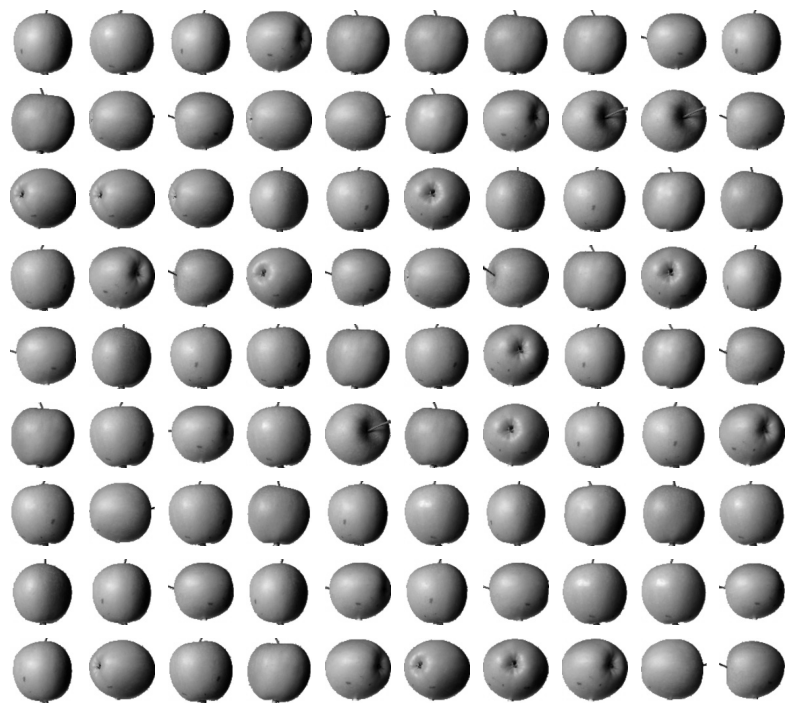

In [17]:
draw_fruits(fruits[km.labels_==2])

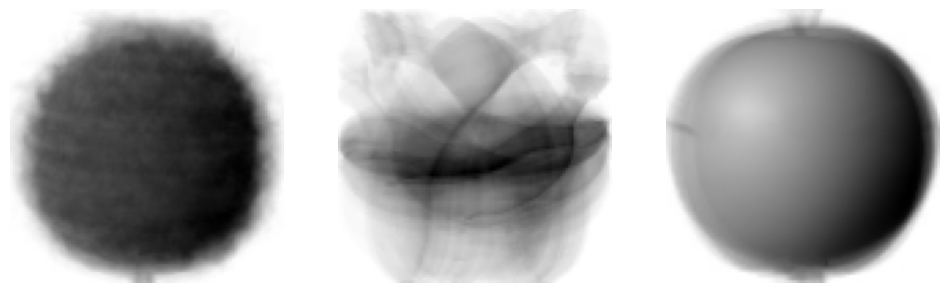

In [20]:
# 파인애플만 오류가 보임
# 훈련 데이터에 타깃 레이블을 제공안했는데 이정도면 쓸만한거 아닌가?? → 맞다. 쓸만한거 맞다 1 따봉

# 클러스터 중심 : cluster_centers_ 속성에 저장 되어있음.
# 이 배열은 fruits_2d 샘플의 클러스터 중심이기 때문에 각 중심을 이미지로 출력해보자
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=4)
# 각 중심을 이미지로 출력하려면              ↑ 이 크기의 2차원 배열로 변경함.

In [22]:
# KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환 해주는
# transform() 메서드를 가지고 있음.
# transform() 메서드는 StandardScaler 클래스 처럼 특성값을 변환 해주는 도구로 사용 가능

print(km.transform(fruits_2d[100:101]))
# 인덱스가 100인 샘플에 적용 -> fit()메서드와 마찬가지로 2차원 배열로 해주어야 함
# 하나의 샘플을 전달 -> (1, 클러스터 개수)인 2차원 배열임
# 첫번재 클러스터(레이블 0) -> 첫번째 원소 파인애플
# 두번째 클러스터(레이블 1) -> 두번째 원소값 바나나
# 세번째 클러스터(레이블 2) -> 세번째 원소값 사과
# [[3400.24197319 8837.37750892 5279.33763699]]
#  파인애플거리    바나나거리     사과거리

[[3400.24197319 8837.37750892 5279.33763699]]


In [23]:
print(km.transform(fruits_2d[200:201]))
# [[4661.3649493  8642.61845541 3094.2021583 ]]
#   파인애플거리    바나나거리     사과거리

[[ 9982.58049829  3713.63284791 10489.74113635]]


In [24]:
# predict() : 가장 가까운 클러스터 중심을 예측 클래스로 사용
print(km.predict(fruits_2d[0:1]))
print(km.predict(fruits_2d[100:101]))
print(km.predict(fruits_2d[200:201])) # 각 0번째, 100번째, 200번째 그림에 대한 예측 레이블

[2]
[0]
[1]


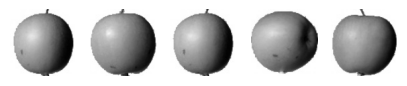

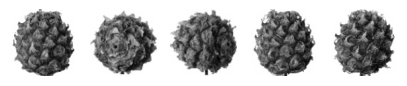

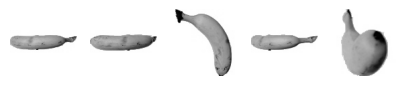

In [25]:
draw_fruits(fruits[0:5])      # 사과임을 확인
draw_fruits(fruits[100:105])  # 파인애플임을 확인....용과 아닌가 저정도면
draw_fruits(fruits[200:205])  # 바나나임을 화-긴

In [27]:
print(km.n_iter_)
# 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾는다. (n_iter_ 반복횟수)

4


In [28]:
# 지금까지는 3개의 객체라는 것을 편법으로 적용해서 분석을 해 보았지만
# 실무에서는 클러스터 개수 조차 모름 n_cluster=3

# 최적의 k 찾기 -> 많은 기법이 있지만 엘보우를 활용해보자.

# k-평균 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴수 잇는데
# 이 거리의 제곱 합을 이너셔(inertia)라고 함
# inertia : 클러스터에 속한 샘플이 얼마나 가깝게 모있는지 나타내는 값
#    (클러스터의 샘플이 얼마나 가깝게 있는지를 나타내는 값)
# 일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에 이너셔도 줄어든다.
# 엘보우에 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적을 클러스터 개수를 찾는다.

# 클러스터 개수를 증가시키면서 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있는데
# 이때부터 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않음
#   -> 이너셔가 크게 줄어들지 않음
# 그래서 팔꿈치 모양이라고 해서 엘보우 방법이라고 부름

# KMeans 클래스에서 자동으로 이너셔를 계산하는 inertia_ 속성이 있음.
# 클러스터 개수 k 를 2~6까지 변경하면서 5번 훈련해보자.

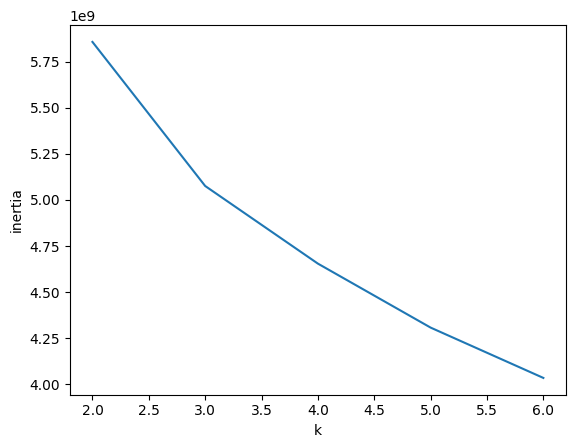

In [30]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, n_init='auto', random_state=42)

  km.fit(fruits_2d)
  inertia.append(km.inertia_)
 #                         n_init: 서로 다른 군집 중심점(centroid)을 최초 셋팅한다.
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# k=3 부분에서 꺾이는 엘보우 현상이 나타난다. -> 3개의 군집으로 만들면됨!
# 그래서 원래는 n_clusters=k 값을 찾은 다음에 from sklearn.cluster import KMeans를 실행한다.